<a href="https://colab.research.google.com/github/Commiejones/MMED-2025-Enhancing-trachoma-elimination/blob/main/Trachoma_diseases_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATA EXPLORATION

In [ ]:
import pandas as pd

cluster   = pd.read_csv('/content/trachoma_sero_transmission_analysis_cluster.csv')
df = pd.read_csv('/content/trachoma_sero_transmission_analysis_indiv.csv')
study      = pd.read_csv('/content/trachoma_sero_transmission_analysis_study.csv')

In [ ]:
print("individual:",df.columns)

individual: Index(['study_id', 'cluster_id', 'household_id', 'individual_id', 'survey',
       'year', 'location_name', 'location_year_name', 'mda', 'age_months',
       'age_years', 'pcr', 'tf', 'ti', 'pgp3_mfi', 'pgp3_mfi_nonneg',
       'pgp3_mfi_log10', 'pgp3_elisa', 'pgp3_mfi_cutoff', 'pgp3_pos',
       'pgp3_minobs'],
      dtype='object')


In [ ]:
df.dtypes

,0
study_id,object
cluster_id,object
household_id,object
individual_id,object
survey,float64
year,int64
location_name,object
location_year_name,object
mda,int64
age_months,float64


In [ ]:
df.nunique()

,0
study_id,9
cluster_id,481
household_id,9605
individual_id,27513
survey,9
year,7
location_name,13
location_year_name,21
mda,2
age_months,97


In [ ]:
df["location_name"].unique()

array(['Wag Hemra, Ethiopia (WUHA)', 'Wag Hemra, Ethiopia (TAITU)',
       'Dosso, Niger (MORDOR)', 'Matameye, Niger (PRET)',
       'Chikwawa, Malawi', 'Mchinji, Malawi', 'Kongwa, Tanzania',
       'Alefa, Ethiopia', 'Andabet, Ethiopia', 'Dera, Ethiopia',
       'Woreta town, Ethiopia', 'Boumalne Dades, Morocco',
       'Agdaz, Morocco'], dtype=object)

In [ ]:
# df is your individual-level DataFrame  -------------------------------
# 1) split once on the first comma
split_cols = df['location_name'].str.split(',', n=1, expand=True)

# 2) location_district  = left-hand side (strip whitespace)
df['location_district'] = split_cols[0].str.strip()

# 3) location_country   = right-hand side *before any "("*
df['location_country'] = (
    split_cols[1]                 # → " Ethiopia (WUHA)" etc.
        .str.split('(', n=1)      # keep text before first "("
        .str[0]
        .str.strip()
)

In [ ]:
# quick sanity-check
print(df[['location_name', 'location_district', 'location_country']].head())

                location_name location_district location_country
0  Wag Hemra, Ethiopia (WUHA)         Wag Hemra         Ethiopia
1  Wag Hemra, Ethiopia (WUHA)         Wag Hemra         Ethiopia
2  Wag Hemra, Ethiopia (WUHA)         Wag Hemra         Ethiopia
3  Wag Hemra, Ethiopia (WUHA)         Wag Hemra         Ethiopia
4  Wag Hemra, Ethiopia (WUHA)         Wag Hemra         Ethiopia


In [ ]:
print("individual:",df.columns)

individual: Index(['study_id', 'cluster_id', 'household_id', 'individual_id', 'survey',
       'year', 'location_name', 'location_year_name', 'mda', 'age_months',
       'age_years', 'pcr', 'tf', 'ti', 'pgp3_mfi', 'pgp3_mfi_nonneg',
       'pgp3_mfi_log10', 'pgp3_elisa', 'pgp3_mfi_cutoff', 'pgp3_pos',
       'pgp3_minobs', 'mda_denominator', 'tf_denominator', 'ti_denominator',
       'pgp3_pos_denominator', 'pcr_denominator', 'location_district',
       'location_country'],
      dtype='object')


In [ ]:
# 1. Define the exact set of columns you want to keep ---------------
keep_cols = [
    'year', 'mda', 'age_months', 'age_years',
    'pcr', 'tf', 'ti', 'pgp3_pos',
    'location_district', 'location_country'
]

# 2. Create a Boolean mask over df.columns
col_mask = df.columns.isin(keep_cols)

# 3. Slice the DataFrame using the mask
df1 = df.loc[:, col_mask]         # keeps original column order

# df1 = df[keep_cols]

# quick check
print(df1.head())
print(df1.columns)

   year  mda  age_months  age_years  pcr   tf   ti  pgp3_pos  \
0  2016    1        60.0          5  0.0  0.0  0.0       0.0   
1  2016    1        65.0          5  0.0  0.0  0.0       0.0   
2  2016    1        84.0          7  0.0  1.0  NaN       0.0   
3  2016    1        60.0          5  1.0  1.0  NaN       1.0   
4  2016    1        50.0          4  0.0  0.0  0.0       0.0   

  location_district location_country  
0         Wag Hemra         Ethiopia  
1         Wag Hemra         Ethiopia  
2         Wag Hemra         Ethiopia  
3         Wag Hemra         Ethiopia  
4         Wag Hemra         Ethiopia  
Index(['year', 'mda', 'age_months', 'age_years', 'pcr', 'tf', 'ti', 'pgp3_pos',
       'location_district', 'location_country'],
      dtype='object')


In [ ]:
df1.describe()

,year,mda,age_months,age_years,pcr,tf,ti,pgp3_pos
count,31110.000000,31110.000000,12865.000000,31110.000000,15094.000000,22772.000000,18049.000000,30504.000000
mean,2016.146159,0.629797,47.610494,4.410383,0.108917,0.214342,0.068923,0.208464
std,2.018625,0.482867,24.683518,2.430675,0.311546,0.410374,0.253331,0.406217
min,2013.000000,0.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,0.000000,29.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,1.000000,47.000000,4.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,1.000000,60.000000,6.000000,0.000000,0.000000,0.000000,0.000000
max,2019.000000,1.000000,119.000000,9.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df1.isnull().sum()

,0
year,0
mda,0
age_months,18245
age_years,0
pcr,16016
tf,8338
ti,13061
pgp3_pos,606
location_district,0
location_country,0


In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31110 entries, 0 to 31109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               31110 non-null  int64  
 1   mda                31110 non-null  int64  
 2   age_months         12865 non-null  float64
 3   age_years          31110 non-null  int64  
 4   pcr                15094 non-null  float64
 5   tf                 22772 non-null  float64
 6   ti                 18049 non-null  float64
 7   pgp3_pos           30504 non-null  float64
 8   location_district  31110 non-null  object 
 9   location_country   31110 non-null  object 
dtypes: float64(5), int64(3), object(2)
memory usage: 2.4+ MB


In [ ]:
# 2. build prevalence summary ---------------------------------------
indicator_cols = ['tf', 'ti', 'pgp3_pos', 'pcr']

summary_rows = []
for col in indicator_cols:
    denom      = df1[col].notna().sum()            # non-null rows
    positives  = df1[col].fillna(0).gt(0).sum()    # assumes values >0 are “positive”
    prevalence = positives / denom if denom else float('nan')

    summary_rows.append({
        'indicator'   : col,
        'denominator' : denom,
        'positives'   : positives,
        'prevalence'  : prevalence          # proportion, 0–1
    })

prev_summary = pd.DataFrame(summary_rows)

# 3. nice display ---------------------------------------------------
prev_summary['prevalence_%'] = (prev_summary['prevalence']*100).round(1)
prev_summary = prev_summary[['indicator','denominator','positives','prevalence_%']]

print(prev_summary.to_string(index=False))

indicator  denominator  positives  prevalence_%
       tf        22772       4881          21.4
       ti        18049       1244           6.9
 pgp3_pos        30504       6359          20.8
      pcr        15094       1644          10.9


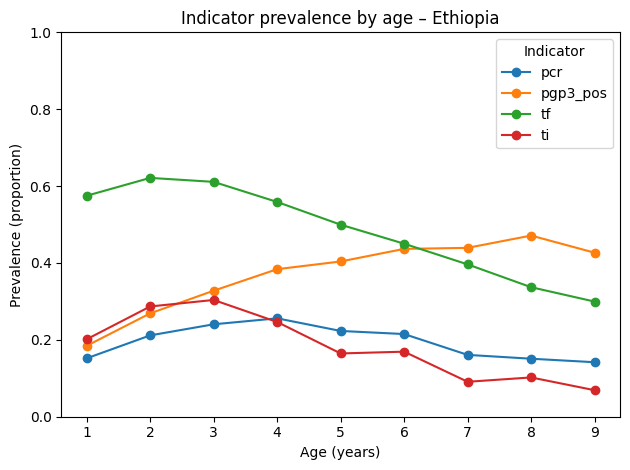

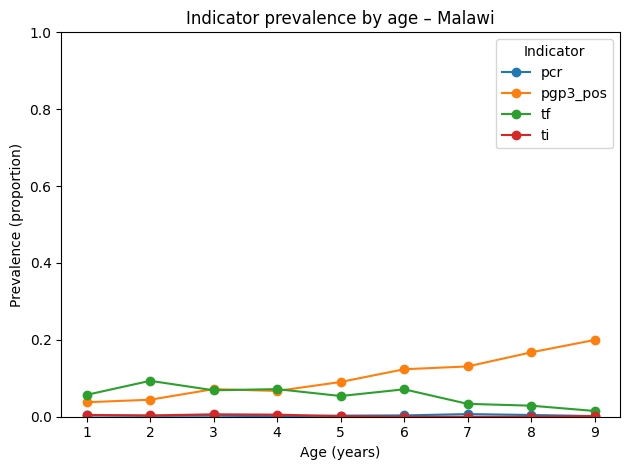

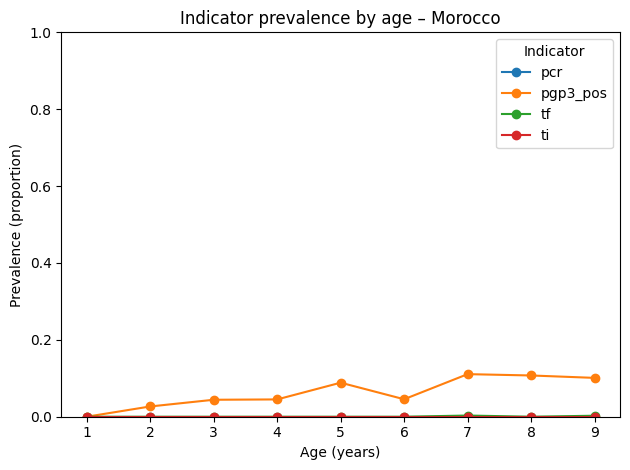

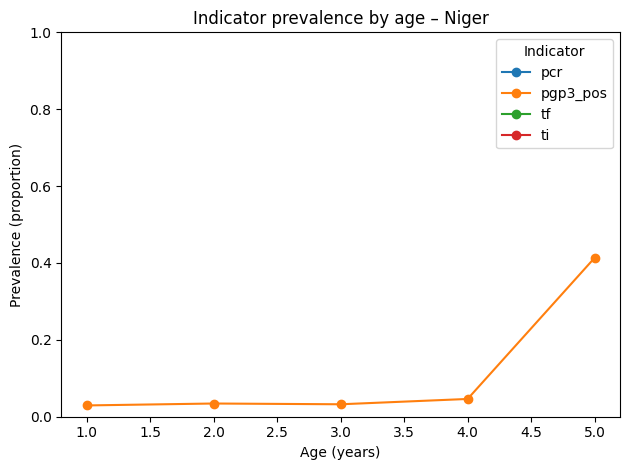

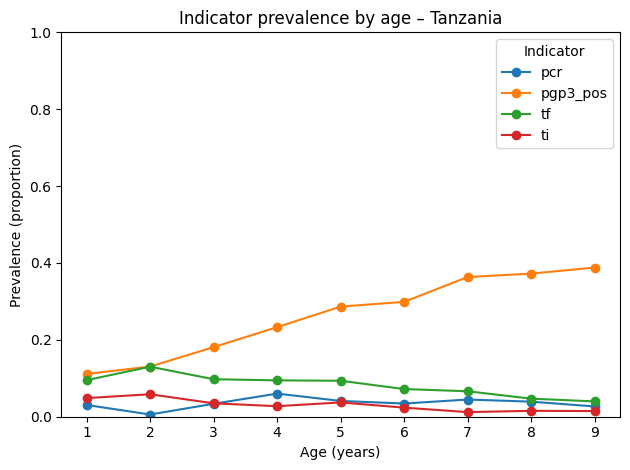

In [ ]:
import matplotlib.pyplot as plt

df["age_year"] = df["age_years"].astype(int)
records = []
for col in indicator_cols:
    grp = (
        df.groupby(['location_country', 'age_year'])[col]
          .agg(denominator = lambda x: x.notna().sum(),
               positives   = lambda x: (x.fillna(0) > 0).sum())
          .reset_index()
    )
    grp['indicator']  = col
    grp['prevalence'] = grp['positives'] / grp['denominator']
    records.append(grp[['location_country', 'age_year', 'indicator', 'prevalence']])

prev_long = pd.concat(records, ignore_index=True)

# ------------------------------------------------------------------
# 2  Plot – one figure per country, age on x, prevalence on y
# ------------------------------------------------------------------
for country, sub in prev_long.groupby('location_country'):
    pivot = sub.pivot(index='age_year', columns='indicator', values='prevalence')

    plt.figure()                              # distinct figure (no subplots)
    pivot.plot(marker='o', ax=plt.gca())      # one line per indicator
    plt.title(f'Indicator prevalence by age – {country}')
    plt.xlabel('Age (years)')
    plt.ylabel('Prevalence (proportion)')
    plt.ylim(0, 1)
    plt.legend(title='Indicator')
    plt.tight_layout()

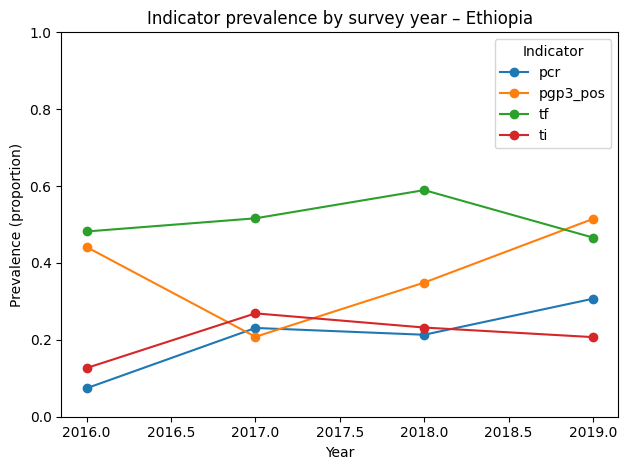

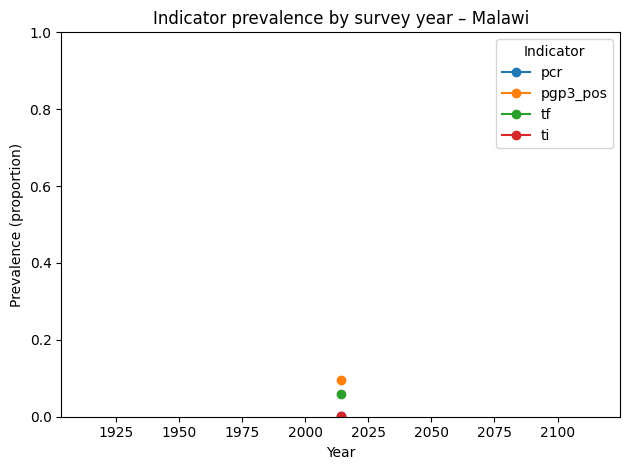

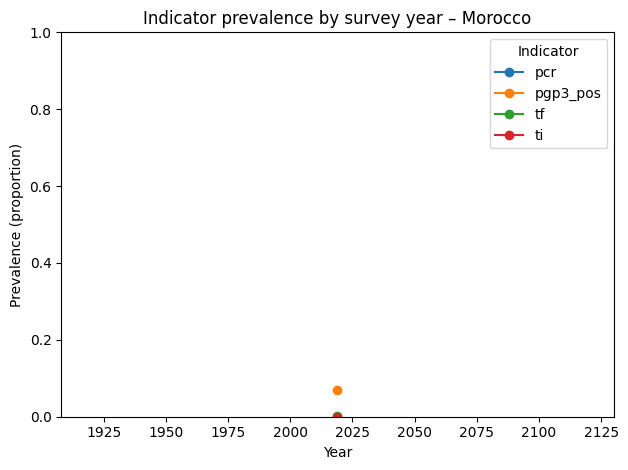

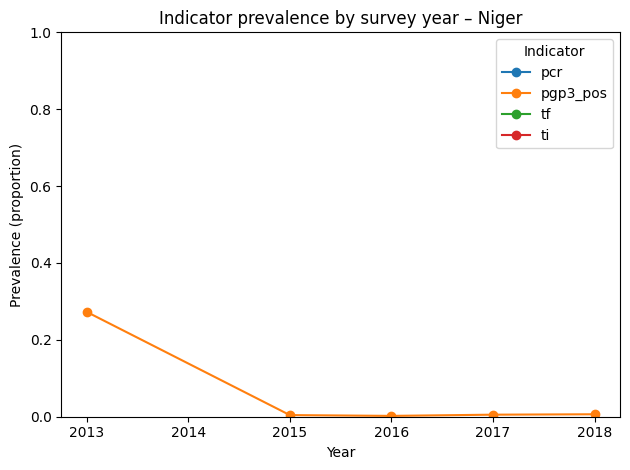

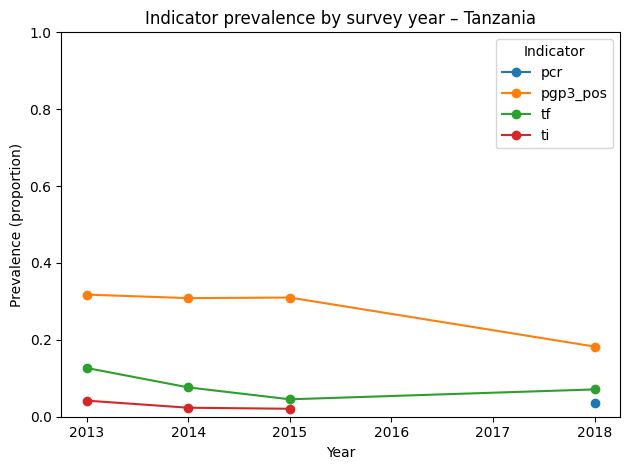

In [ ]:
records = []
for col in indicator_cols:
    grp = (
        df.groupby(['location_country', 'year'])[col]
          .agg(denominator = lambda x: x.notna().sum(),
               positives   = lambda x: (x.fillna(0) > 0).sum())
          .reset_index()
    )
    grp['indicator']  = col
    grp['prevalence'] = grp['positives'] / grp['denominator']
    records.append(grp[['location_country', 'year', 'indicator', 'prevalence']])

prev_long = pd.concat(records, ignore_index=True)

# ------------------------------------------------------------------
# 2.  Plot – one figure per country, YEAR on x-axis, prevalence on y-axis
# ------------------------------------------------------------------
for country, sub in prev_long.groupby('location_country'):
    pivot = sub.pivot(index='year', columns='indicator', values='prevalence')

    plt.figure()                               # one distinct plot
    pivot.sort_index().plot(marker='o', ax=plt.gca())
    plt.title(f'Indicator prevalence by survey year – {country}')
    plt.xlabel('Year')
    plt.ylabel('Prevalence (proportion)')
    plt.ylim(0, 1)
    plt.legend(title='Indicator')
    plt.tight_layout()
    plt.show()

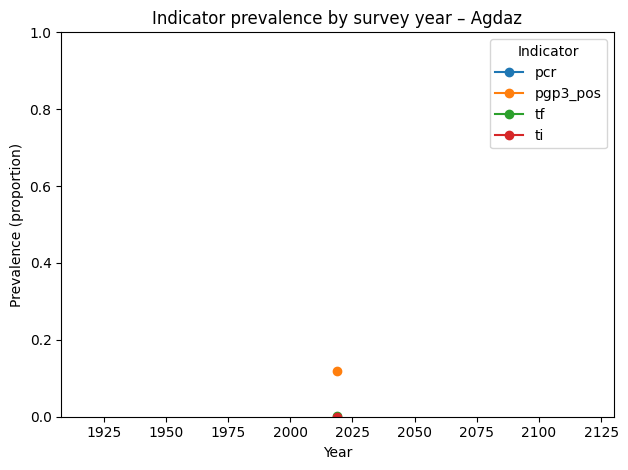

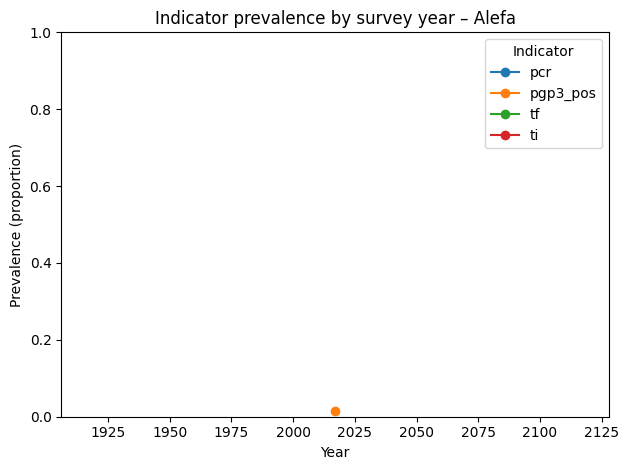

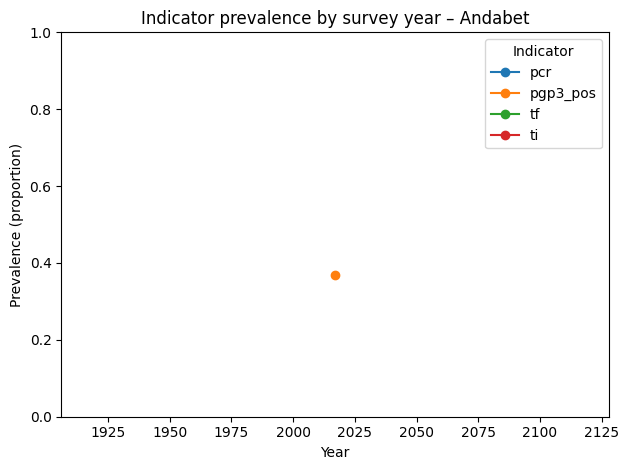

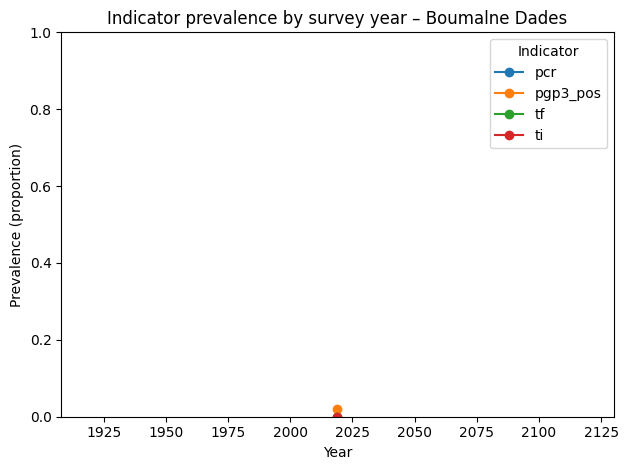

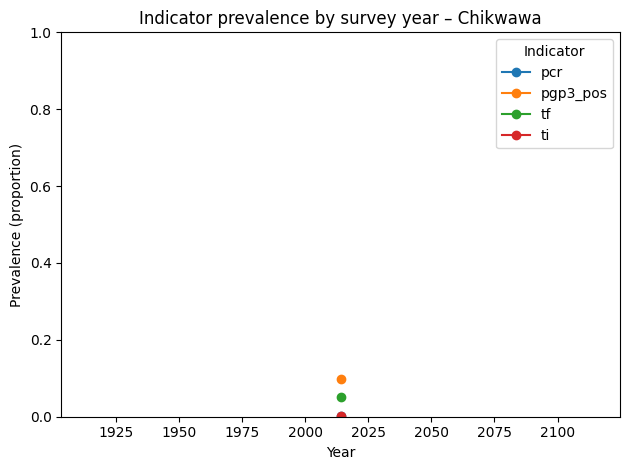

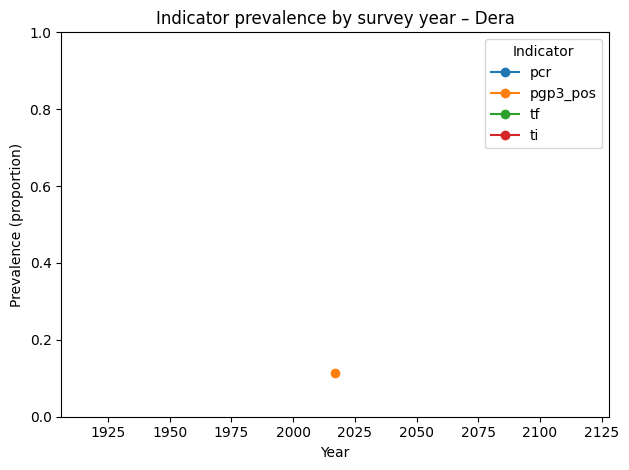

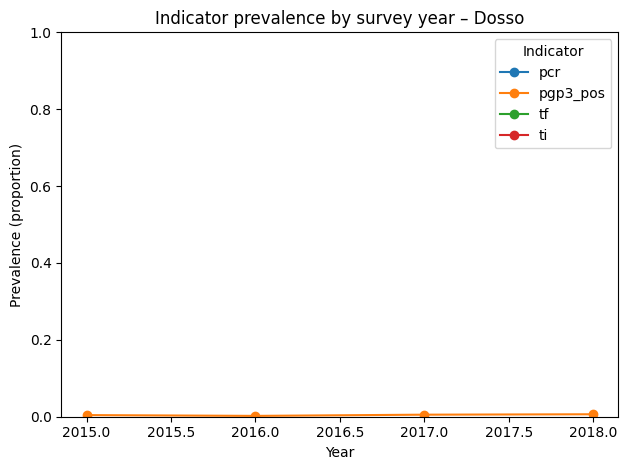

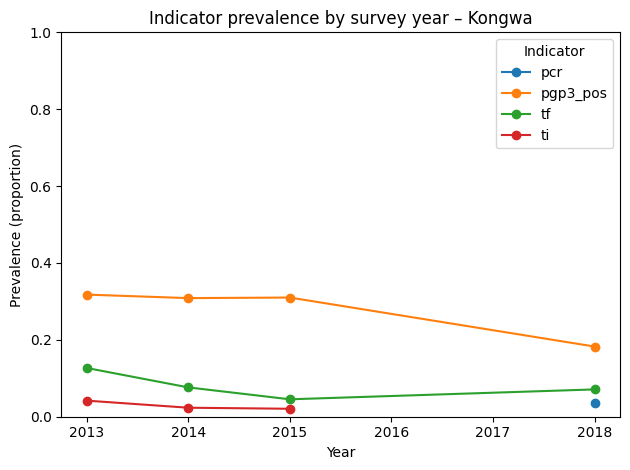

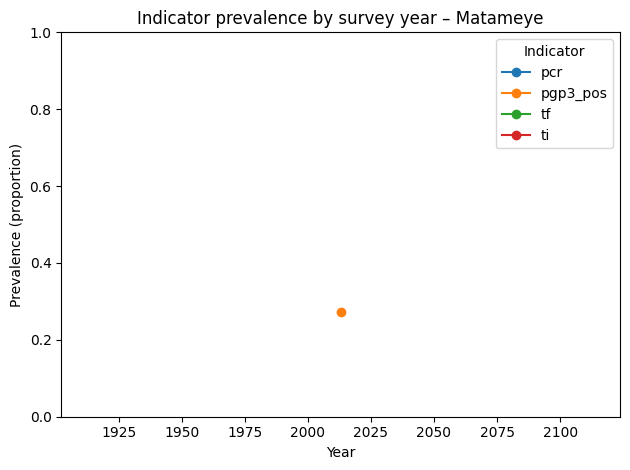

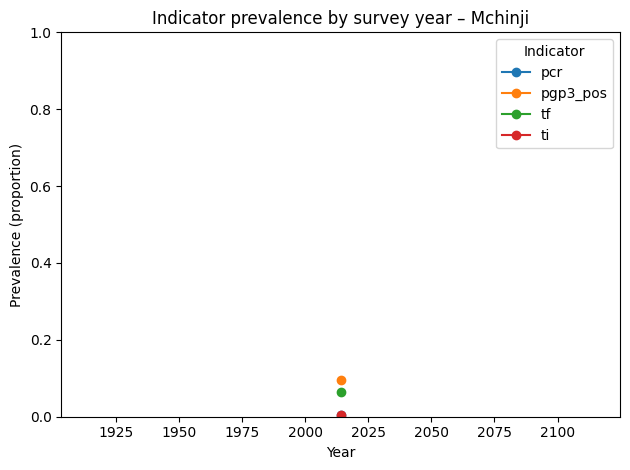

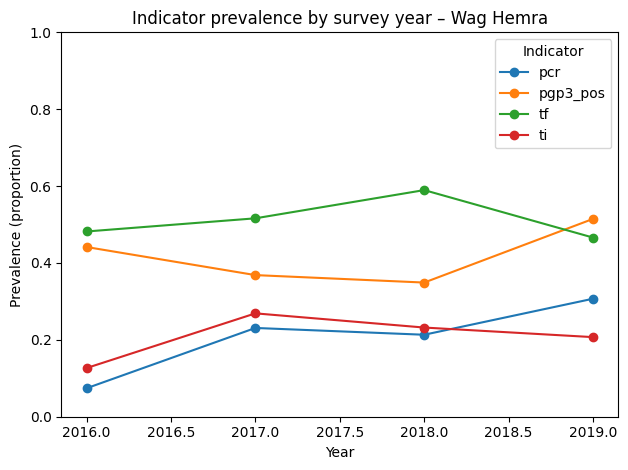

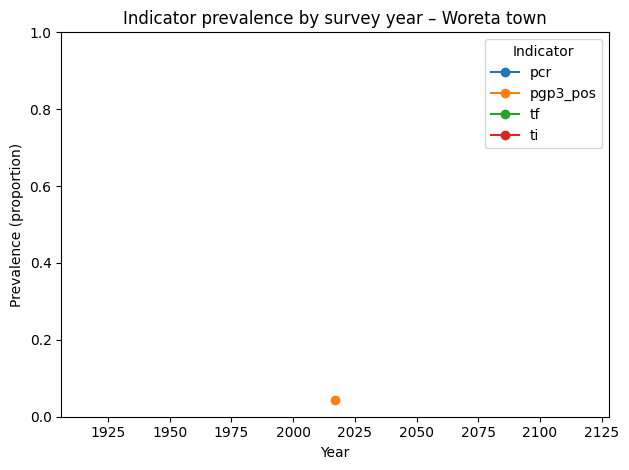

In [ ]:
records = []
for col in indicator_cols:
    grp = (
        df.groupby(['location_district', 'year'])[col]
          .agg(denominator = lambda x: x.notna().sum(),
               positives   = lambda x: (x.fillna(0) > 0).sum())
          .reset_index()
    )
    grp['indicator']  = col
    grp['prevalence'] = grp['positives'] / grp['denominator']
    records.append(grp[['location_district', 'year', 'indicator', 'prevalence']])

prev_long = pd.concat(records, ignore_index=True)

# ------------------------------------------------------------------
# 2.  Plot – one figure per site, YEAR on x-axis, prevalence on y-axis
# ------------------------------------------------------------------
for district, sub in prev_long.groupby('location_district'):
    pivot = sub.pivot(index='year', columns='indicator', values='prevalence')

    plt.figure()                               # one distinct plot
    pivot.sort_index().plot(marker='o', ax=plt.gca())
    plt.title(f'Indicator prevalence by survey year – {district}')
    plt.xlabel('Year')
    plt.ylabel('Prevalence (proportion)')
    plt.ylim(0, 1)
    plt.legend(title='Indicator')
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-137-2292091843.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap('tab10', len(indicator_cols))


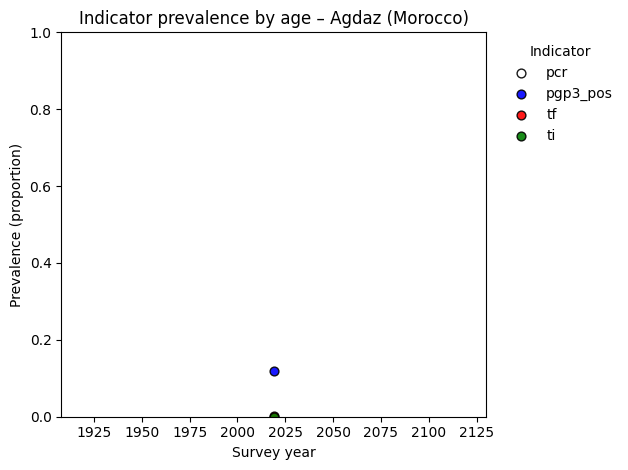

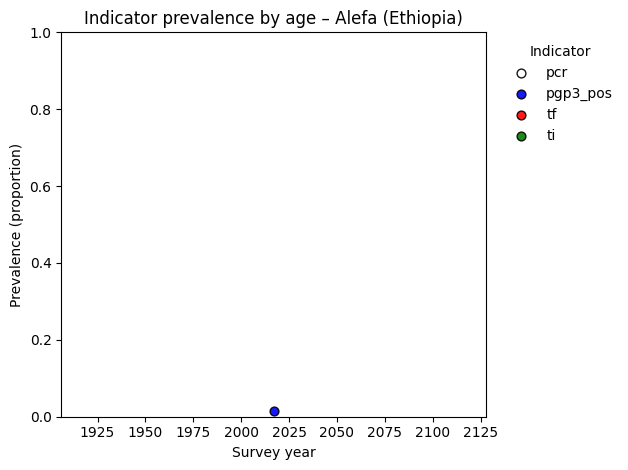

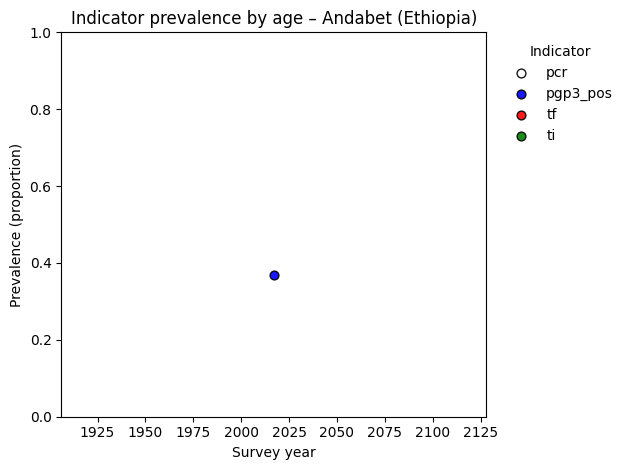

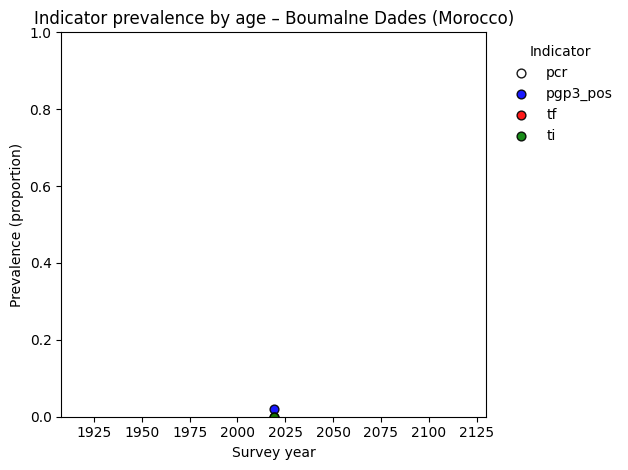

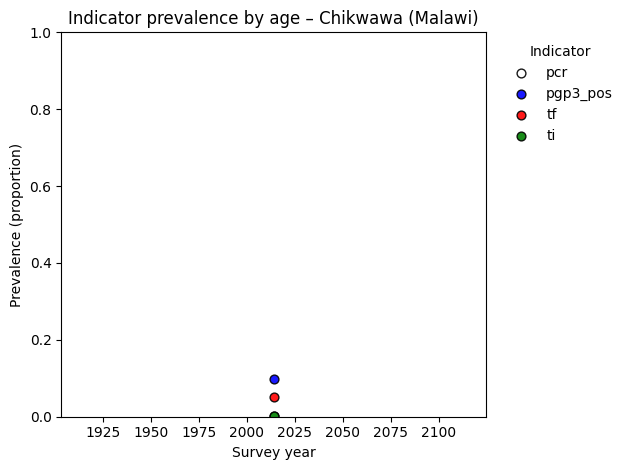

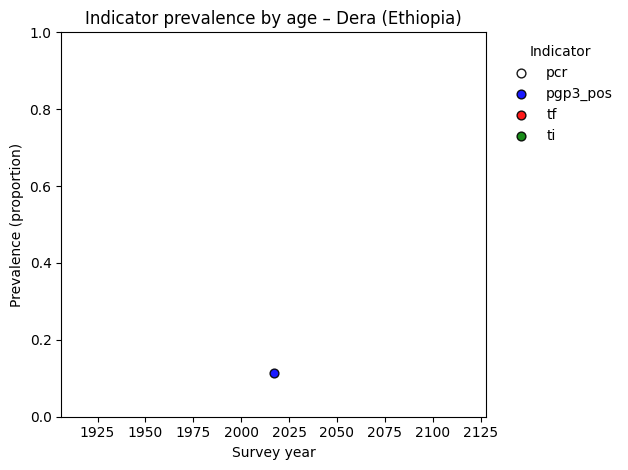

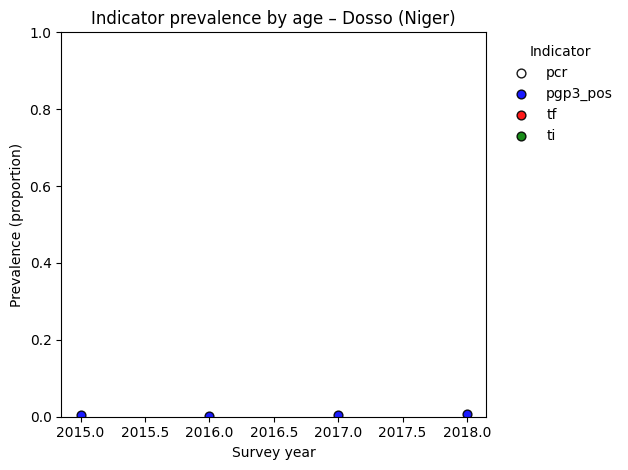

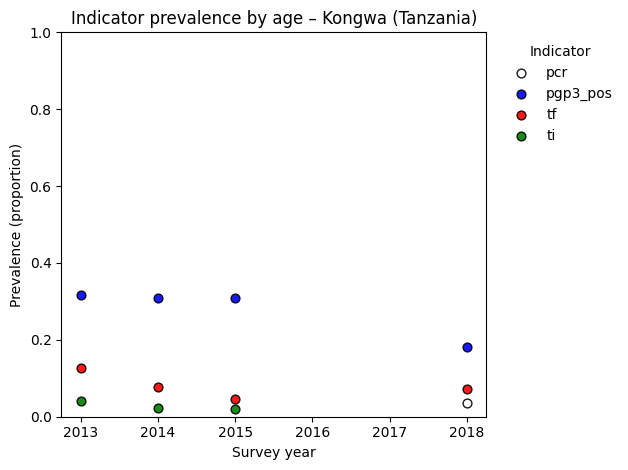

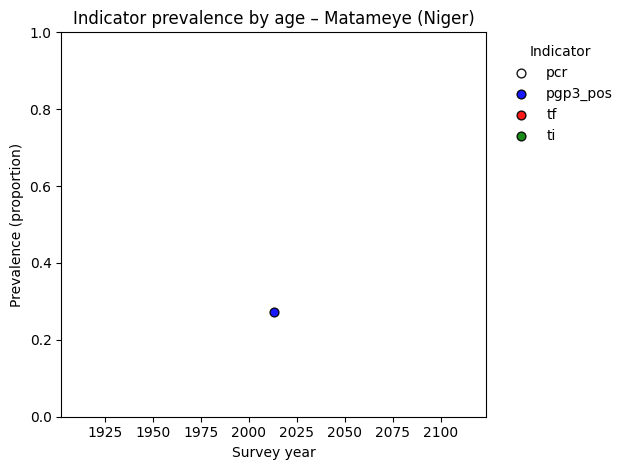

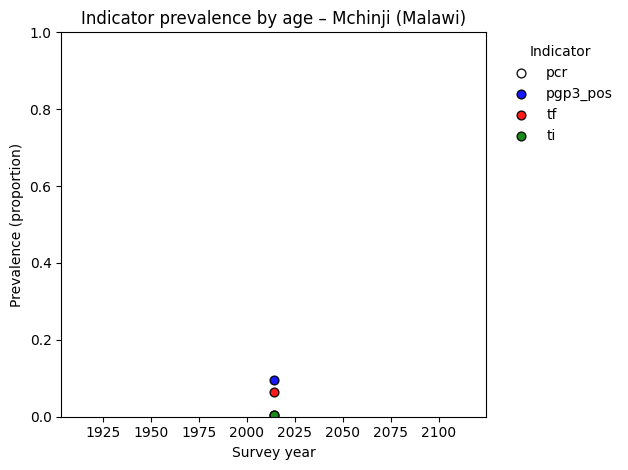

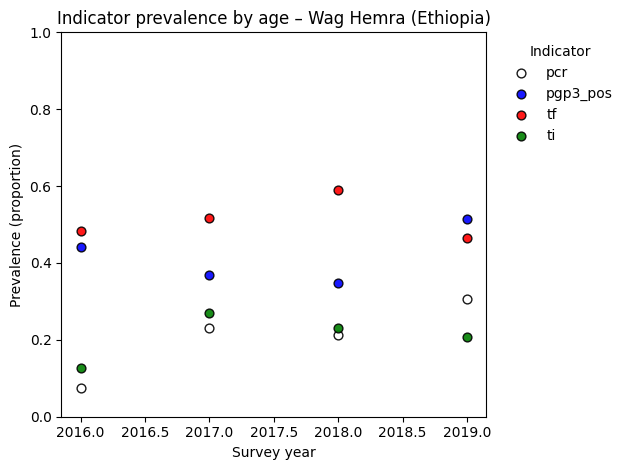

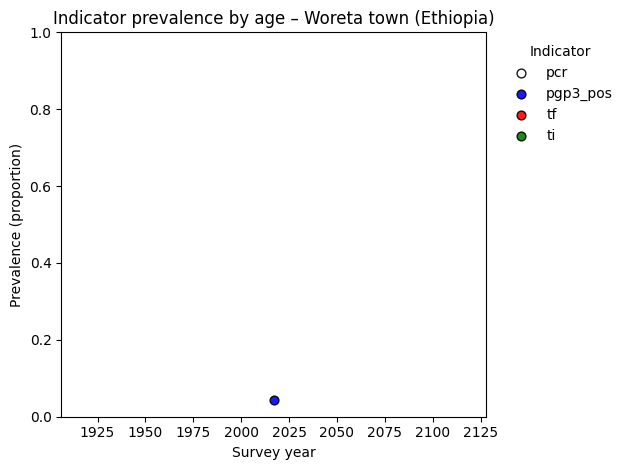

In [ ]:
records_age_district = []
for col in indicator_cols:          # indicator_cols already defined
    grp = (
        df.groupby(['location_district', 'location_country', 'year'])[col]
          .agg(denominator=lambda x: x.notna().sum(),
               positives=lambda x: (x.fillna(0) > 0).sum())
          .reset_index()
    )
    grp['indicator']  = col
    grp['prevalence'] = grp['positives'] / grp['denominator']
    records_age_district.append(
        grp[['location_district', 'location_country', 'year',
             'indicator', 'prevalence']]
    )

prev_long_age_district = pd.concat(records_age_district, ignore_index=True)

# ── 2. Auto-colour map (as many colours as indicators) ─────────────────────
palette = cm.get_cmap('tab10', len(indicator_cols))
indicator_map = {
    ind: palette(i) for i, ind in enumerate(indicator_cols)
}

# ── 3. Plot: one scatter chart per district, title shows country ───────────
for (district, country), sub in (
        prev_long_age_district.groupby(
            ['location_district', 'location_country'], sort=False)):

    plt.figure()
    colors = ['red', 'green', 'blue', 'white']
    indicator_map = {ind: colors[i % len(colors)] for i, ind in enumerate(prev_global['indicator'].unique())}
    for ind, g in sub.groupby('indicator'):
        plt.scatter(
            g['year'],
            g['prevalence'],
            label=ind,
            color=indicator_map[ind],
            edgecolor='k',
            alpha=0.9,
            s=40
        )

    plt.title(f'Indicator prevalence by age – {district} ({country})')
    plt.xlabel('Survey year')
    plt.ylabel('Prevalence (proportion)')
    plt.ylim(0, 1)
    plt.legend(title='Indicator', bbox_to_anchor=(1.02, 1),
               loc='upper left', frameon=False)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-135-4280565620.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap('tab10', len(indicator_cols))


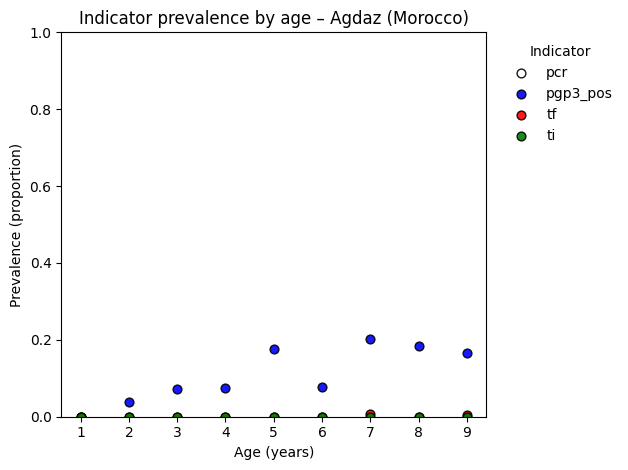

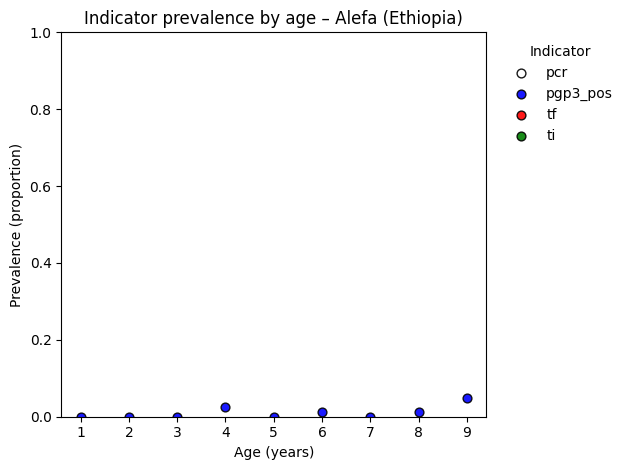

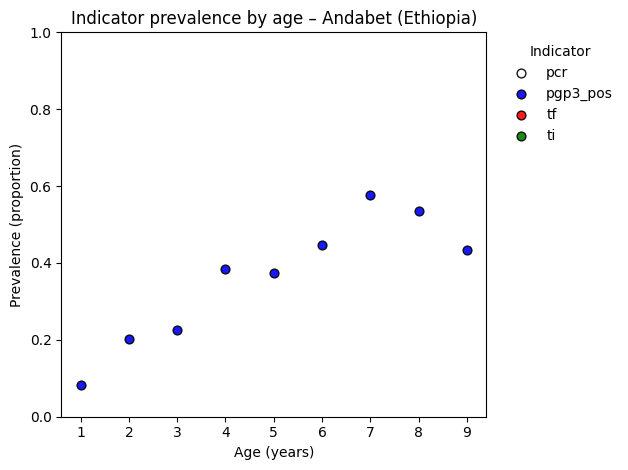

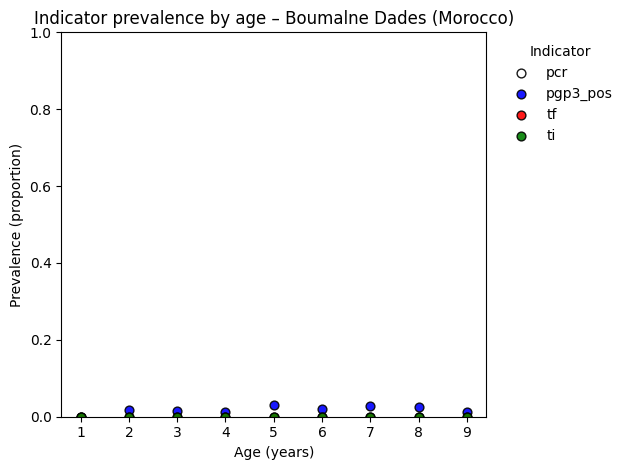

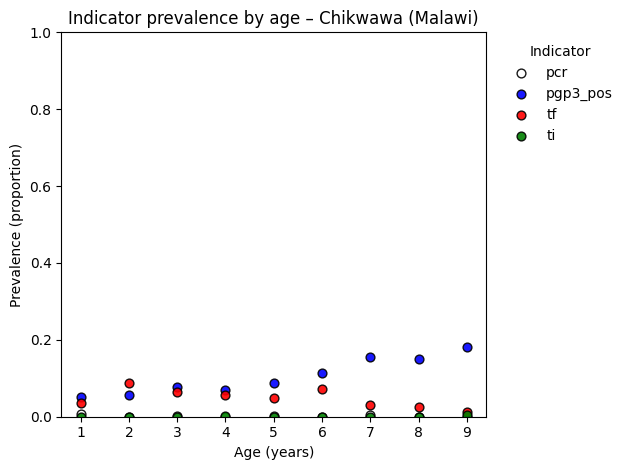

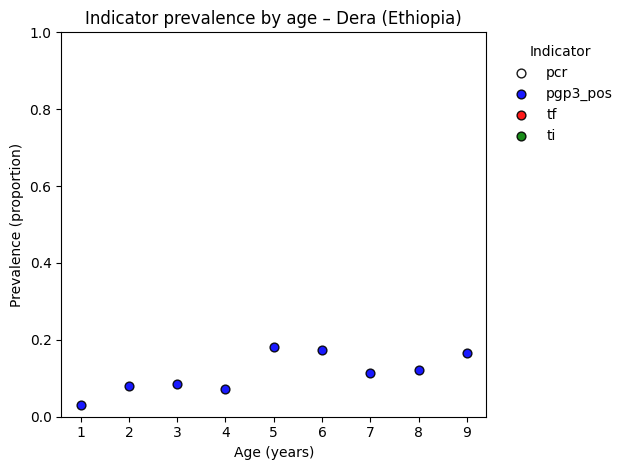

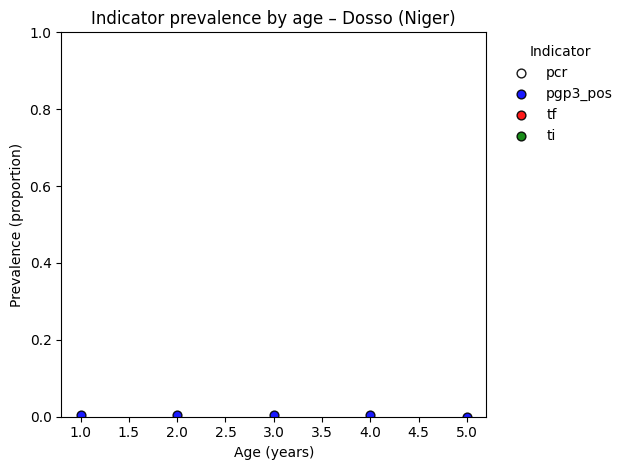

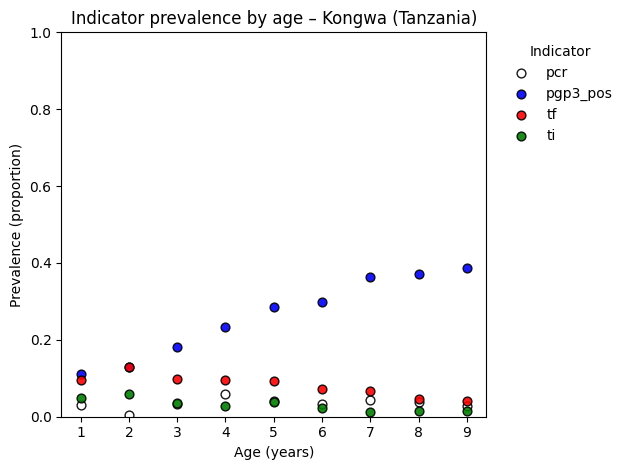

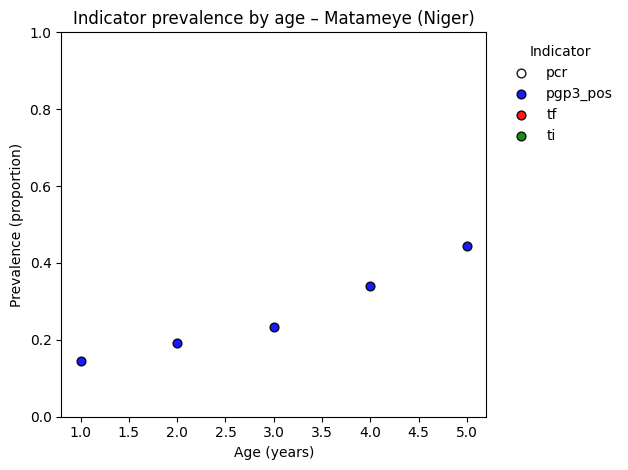

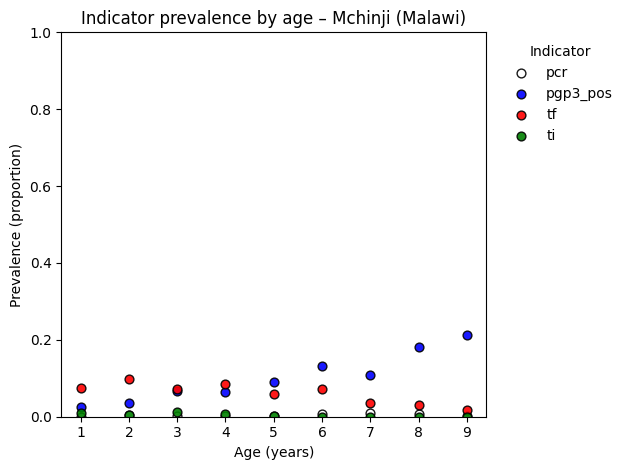

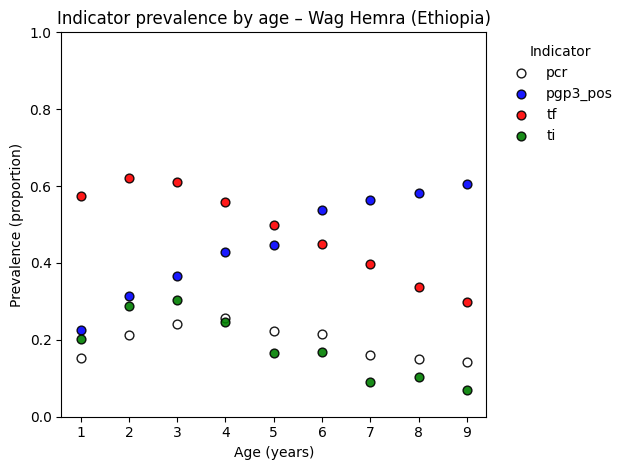

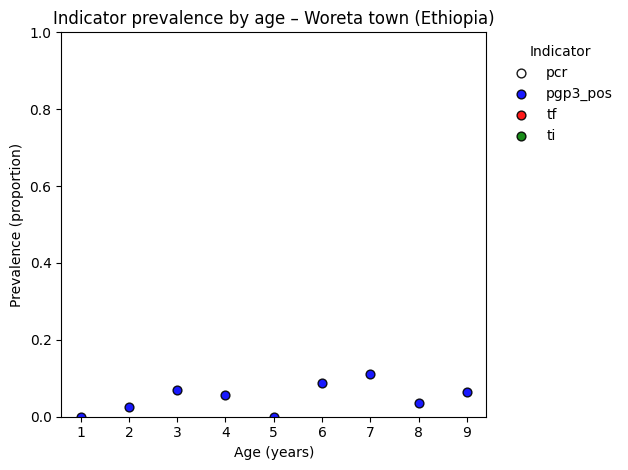

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

# ── 1. Build prevalence table (district × age × indicator) ────────────────
records_age_district = []
for col in indicator_cols:          # indicator_cols already defined
    grp = (
        df.groupby(['location_district', 'location_country', 'age_year'])[col]
          .agg(denominator=lambda x: x.notna().sum(),
               positives=lambda x: (x.fillna(0) > 0).sum())
          .reset_index()
    )
    grp['indicator']  = col
    grp['prevalence'] = grp['positives'] / grp['denominator']
    records_age_district.append(
        grp[['location_district', 'location_country', 'age_year',
             'indicator', 'prevalence']]
    )

prev_long_age_district = pd.concat(records_age_district, ignore_index=True)

# ── 2. Auto-colour map (as many colours as indicators) ─────────────────────
palette = cm.get_cmap('tab10', len(indicator_cols))
indicator_map = {
    ind: palette(i) for i, ind in enumerate(indicator_cols)
}

# ── 3. Plot: one scatter chart per district, title shows country ───────────
for (district, country), sub in (
        prev_long_age_district.groupby(
            ['location_district', 'location_country'], sort=False)):

    plt.figure()
    colors = ['red', 'green', 'blue', 'white']
    indicator_map = {ind: colors[i % len(colors)] for i, ind in enumerate(prev_global['indicator'].unique())}
    for ind, g in sub.groupby('indicator'):
        plt.scatter(
            g['age_year'],
            g['prevalence'],
            label=ind,
            color=indicator_map[ind],
            edgecolor='k',
            alpha=0.9,
            s=40
        )

    plt.title(f'Indicator prevalence by age – {district} ({country})')
    plt.xlabel('Age (years)')
    plt.ylabel('Prevalence (proportion)')
    plt.ylim(0, 1)
    plt.legend(title='Indicator', bbox_to_anchor=(1.02, 1),
               loc='upper left', frameon=False)
    plt.tight_layout()
    plt.show()


=== GLOBAL PREVALENCE TABLE (indicator × year) ===
year       2013  2014  2015  2016  2017  2018  2019
indicator                                          
pcr         NaN 0.003   NaN 0.074 0.231 0.139 0.307
pgp3_pos  0.300 0.139 0.111 0.312 0.161 0.222 0.283
tf        0.127 0.062 0.045 0.482 0.516 0.337 0.218
ti        0.042 0.007 0.021 0.127 0.269 0.232 0.077


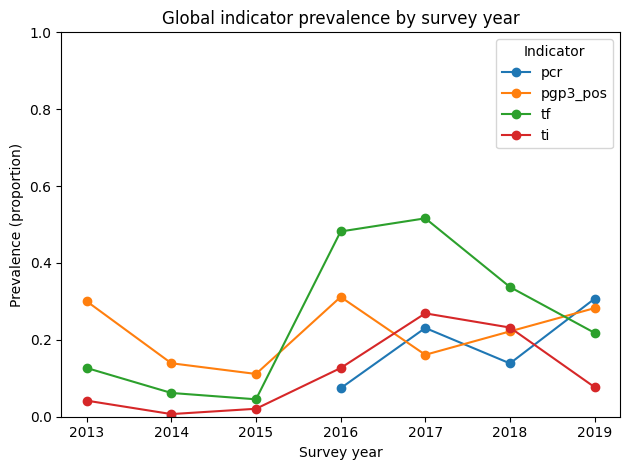

In [ ]:
# Choose the indicators you really want to track
indicator_cols = ['tf', 'ti', 'pgp3_pos', 'pcr']

binary_cols = ['tf', 'ti', 'pcr', 'pgp3_pos']             # 0/1 fields
continuous_cols = [c for c in indicator_cols if c not in binary_cols]

# ------------------------------------------------------------------
# 1 – Compute global prevalence per YEAR × INDICATOR
# ------------------------------------------------------------------
records = []
for col in indicator_cols:
    # Global (no country grouping) – just by survey year
    grouped = (
        df.groupby('year')[col]
          .agg(denominator=lambda x: x.notna().sum(),
               positives=lambda x: (
                   x.eq(1).sum() if col in binary_cols          # strict 1s
                   else x.fillna(0).gt(0).sum()                 # >0 for non-binary col
               ))
          .reset_index()
    )
    grouped['indicator']  = col
    grouped['prevalence'] = grouped['positives'] / grouped['denominator']
    records.append(grouped[['indicator', 'year', 'prevalence', 'denominator']])

prev_global = pd.concat(records, ignore_index=True)

# ------------------------------------------------------------------
# 2 – Wide table for inspection / export
# ------------------------------------------------------------------
prev_table = (
    prev_global
      .pivot_table(index='indicator', columns='year', values='prevalence')
      .sort_index()
)
print("\n=== GLOBAL PREVALENCE TABLE (indicator × year) ===")
print(prev_table.to_string(float_format=lambda v: f"{v:0.3f}"))

# Optional save
# prev_table.to_csv("global_prevalence_by_year.csv")

# ------------------------------------------------------------------
# 3 – Plot – one global figure (lines = indicators)
# ------------------------------------------------------------------
plt.figure()                                  # one distinct plot
for ind, sub in prev_global.groupby('indicator'):
    plt.plot(sub['year'], sub['prevalence'], marker='o', label=ind)

plt.xlabel('Survey year')
plt.ylabel('Prevalence (proportion)')
plt.title('Global indicator prevalence by survey year')
plt.ylim(0, 1)
plt.legend(title='Indicator')
plt.tight_layout()
plt.show()

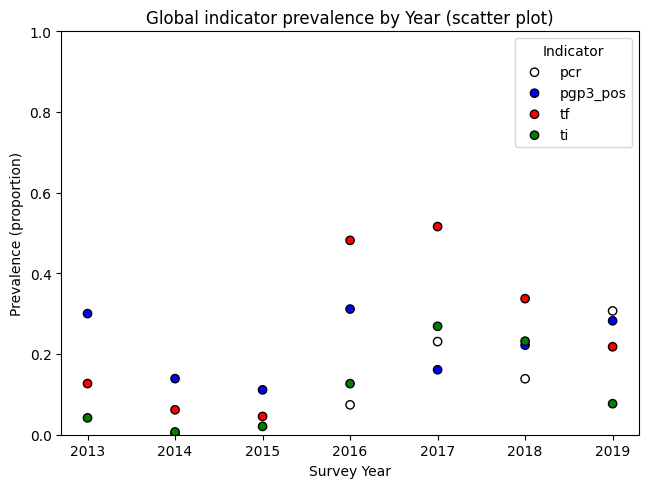

In [ ]:
plt.figure()
colors = ['red', 'green', 'blue', 'white']  # Added a fourth color
indicator_map = {ind: colors[i % len(colors)] for i, ind in enumerate(prev_global['indicator'].unique())}

for ind, sub in prev_global.groupby('indicator'):
    plt.scatter(sub['year'], sub['prevalence'], label=ind, c=sub['indicator'].map(indicator_map), edgecolor='k')

plt.xlabel('Survey Year')
plt.ylabel('Prevalence (proportion)')
plt.title('Global indicator prevalence by Year (scatter plot)')
plt.ylim(0, 1)
plt.legend(title='Indicator')
plt.tight_layout(
    pad=0.4, w_pad=0.5, h_pad=1.0
)
plt.show()


=== GLOBAL PREVALENCE TABLE (indicator × year) ===
age_year      1     2     3     4     5     6     7     8     9
indicator                                                      
pcr       0.082 0.105 0.140 0.155 0.133 0.094 0.076 0.074 0.053
pgp3_pos  0.089 0.118 0.156 0.179 0.288 0.271 0.305 0.341 0.307
tf        0.257 0.279 0.290 0.271 0.246 0.159 0.135 0.118 0.079
ti        0.076 0.096 0.120 0.100 0.070 0.043 0.023 0.032 0.017


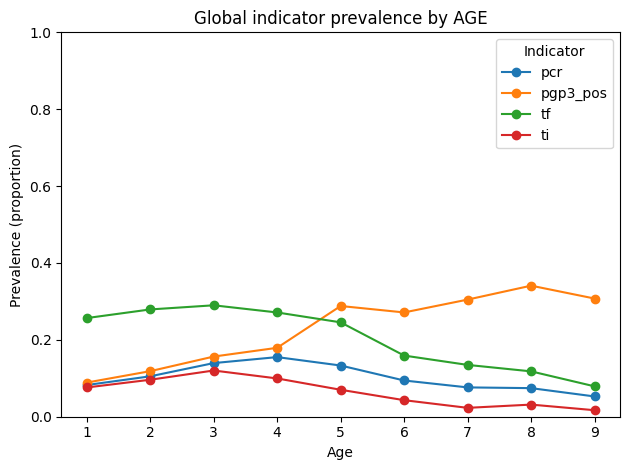

In [ ]:
records = []
for col in indicator_cols:
    # Global (no country grouping) – just by survey year
    grouped = (
        df.groupby('age_year')[col]
          .agg(denominator=lambda x: x.notna().sum(),
               positives=lambda x: (
                   x.eq(1).sum() if col in binary_cols          # strict 1s
                   else x.fillna(0).gt(0).sum()                 # >0 for non-binary col
               ))
          .reset_index()
    )
    grouped['indicator']  = col
    grouped['prevalence'] = grouped['positives'] / grouped['denominator']
    records.append(grouped[['indicator', 'age_year', 'prevalence', 'denominator']])

prev_global = pd.concat(records, ignore_index=True)

# ------------------------------------------------------------------
# 2 – Wide table for inspection / export
# ------------------------------------------------------------------
prev_table = (
    prev_global
      .pivot_table(index='indicator', columns='age_year', values='prevalence')
      .sort_index()
)
print("\n=== GLOBAL PREVALENCE TABLE (indicator × year) ===")
print(prev_table.to_string(float_format=lambda v: f"{v:0.3f}"))

# Optional save
# prev_table.to_csv("global_prevalence_by_year.csv")

# ------------------------------------------------------------------
# 3 – Plot – one global figure (lines = indicators)
# ------------------------------------------------------------------
plt.figure()                                  # one distinct plot
for ind, sub in prev_global.groupby('indicator'):
    plt.plot(sub['age_year'], sub['prevalence'], marker='o', label=ind)

plt.xlabel('Age')
plt.ylabel('Prevalence (proportion)')
plt.title('Global indicator prevalence by AGE')
plt.ylim(0, 1)
plt.legend(title='Indicator')
plt.tight_layout()
plt.show()

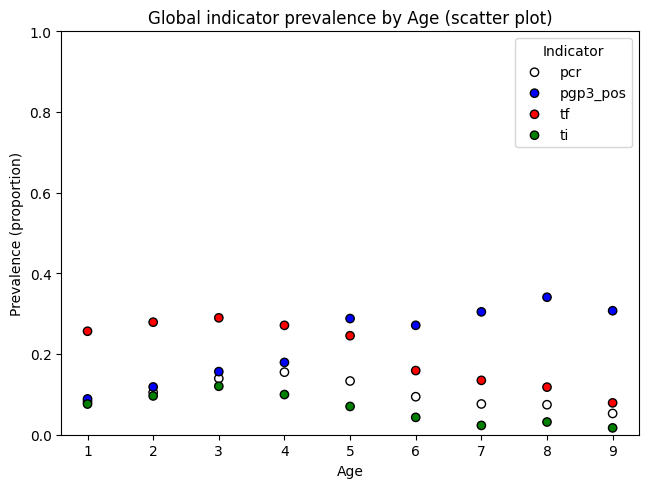

In [ ]:
plt.figure()
colors = ['red', 'green', 'blue', 'white']  # Added a fourth color
indicator_map = {ind: colors[i % len(colors)] for i, ind in enumerate(prev_global['indicator'].unique())}

for ind, sub in prev_global.groupby('indicator'):
    plt.scatter(sub['age_year'], sub['prevalence'], label=ind, c=sub['indicator'].map(indicator_map), edgecolor='k')

plt.xlabel('Age')
plt.ylabel('Prevalence (proportion)')
plt.title('Global indicator prevalence by Age (scatter plot)')
plt.ylim(0, 1)
plt.legend(title='Indicator')
plt.tight_layout(
    pad=0.4, w_pad=0.5, h_pad=1.0
)
plt.show()

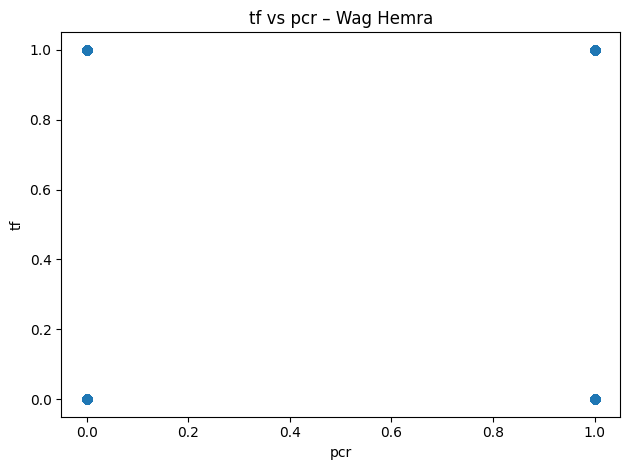

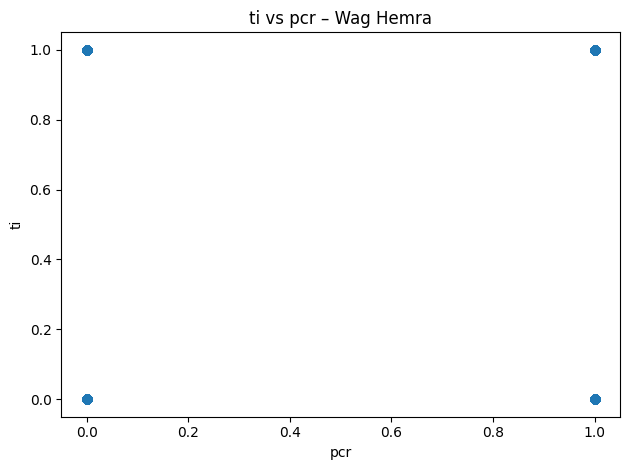

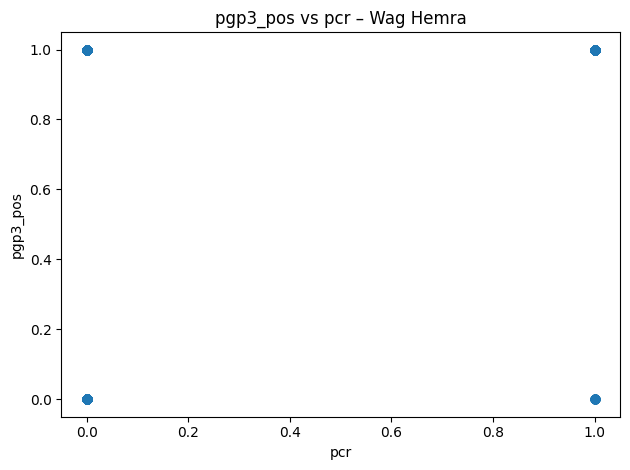

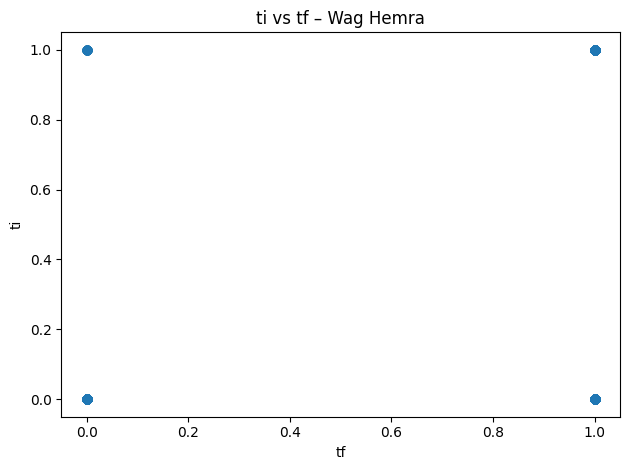

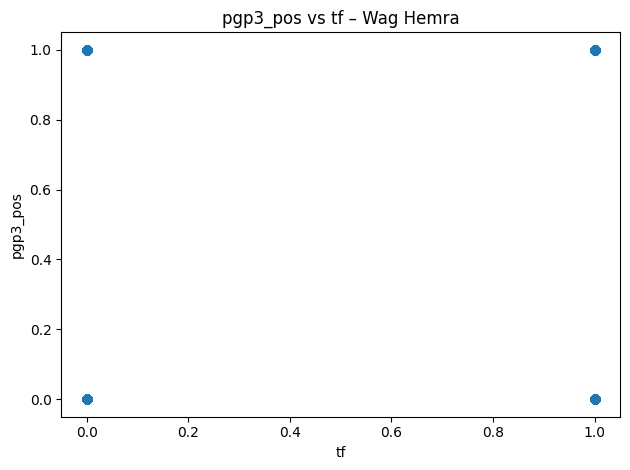

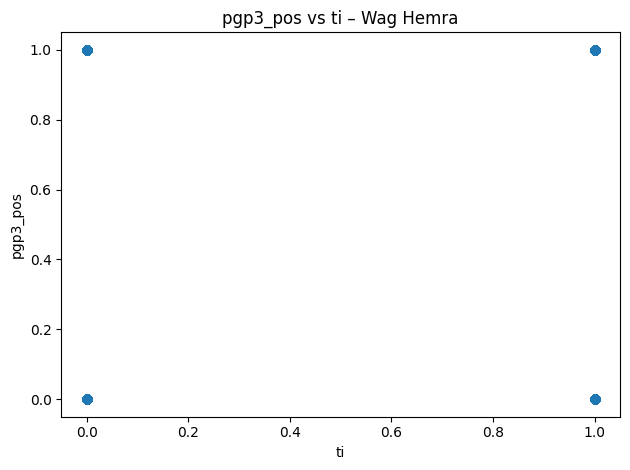

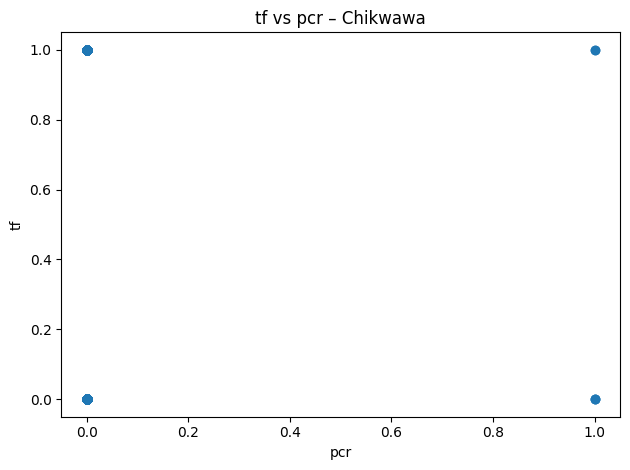

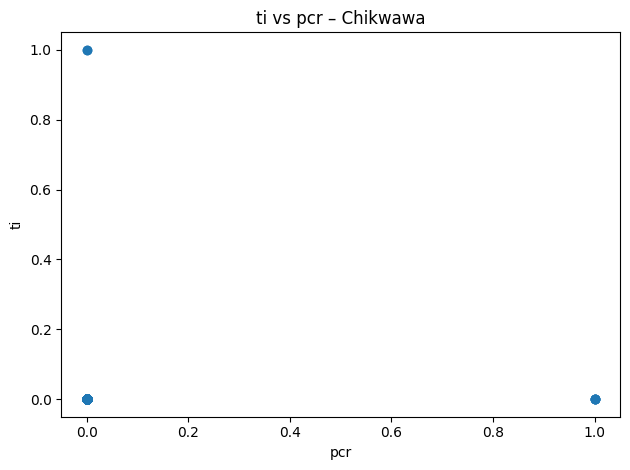

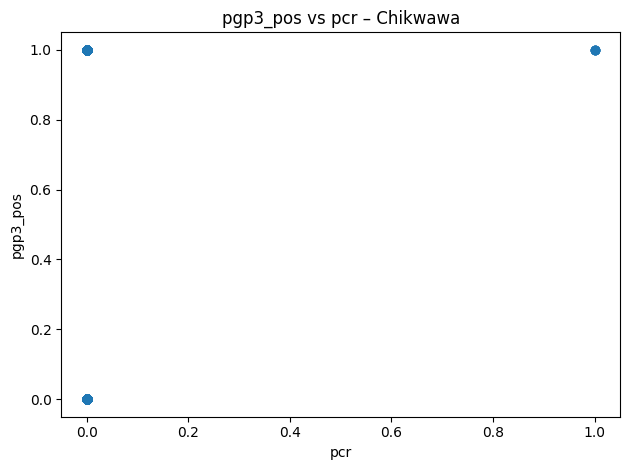

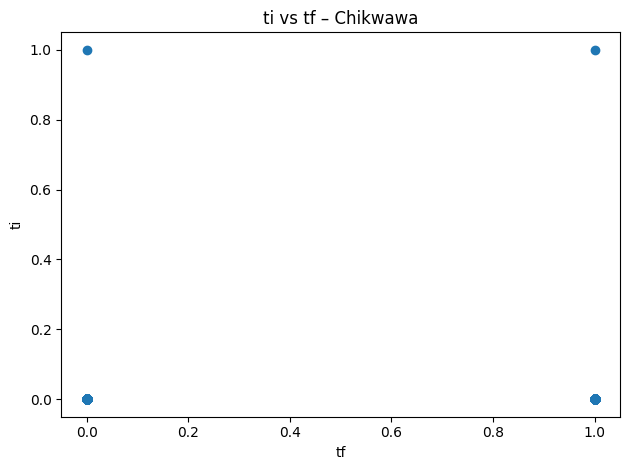

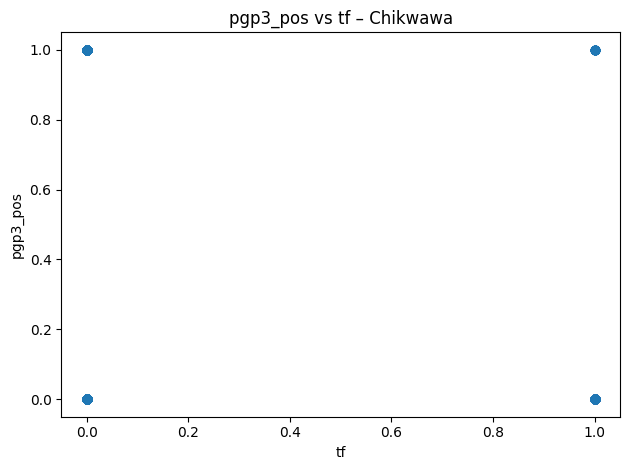

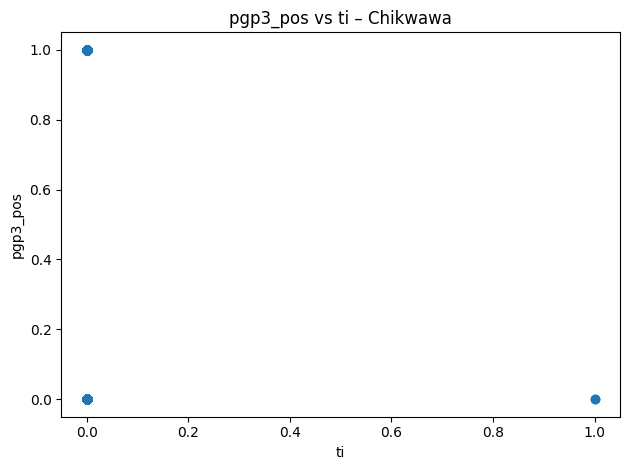

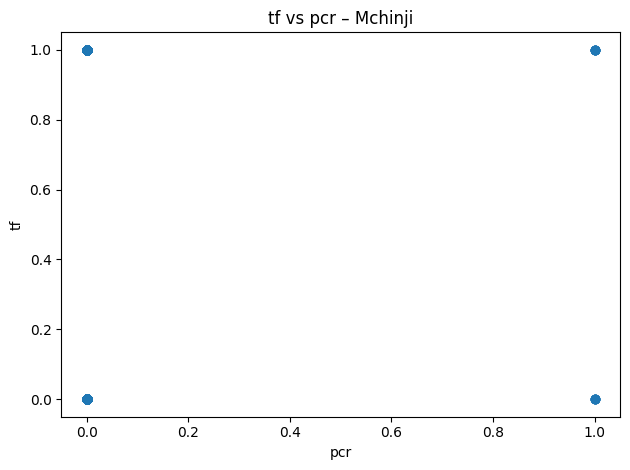

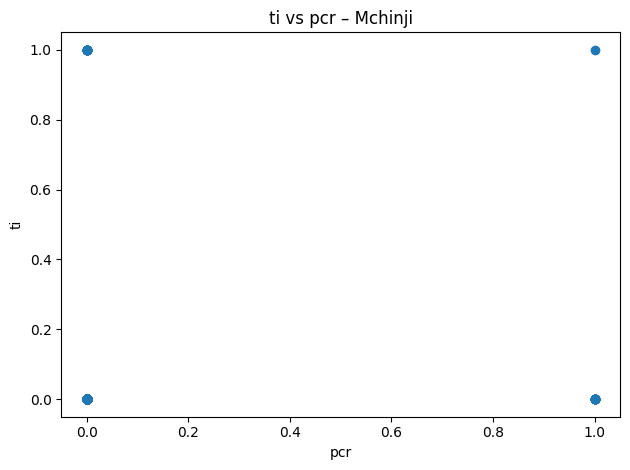

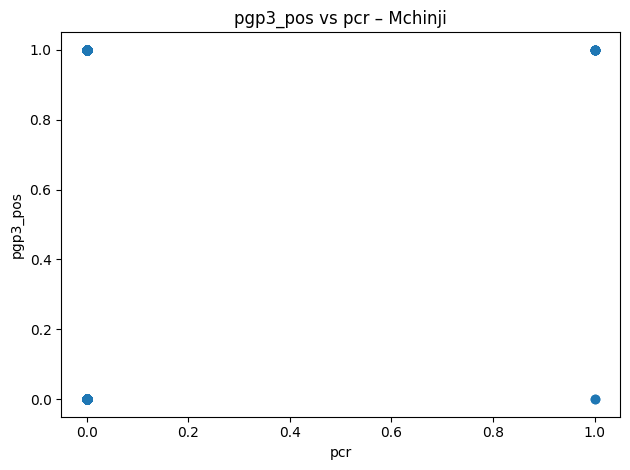

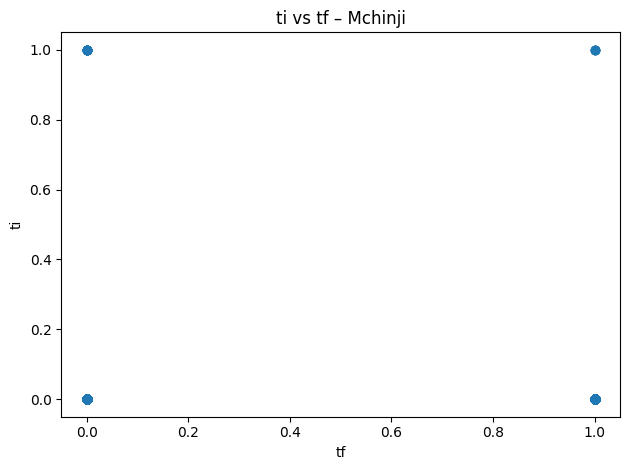

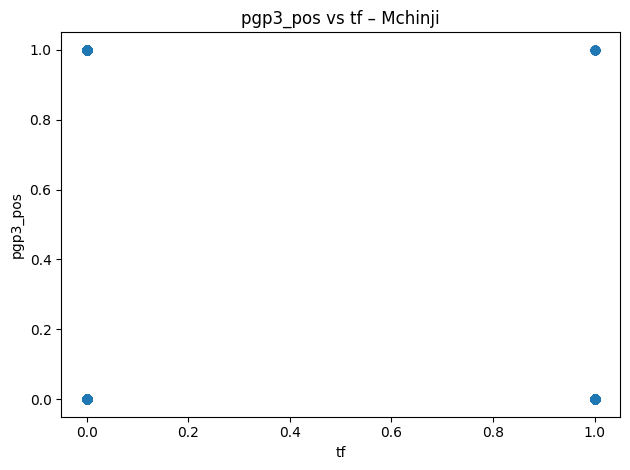

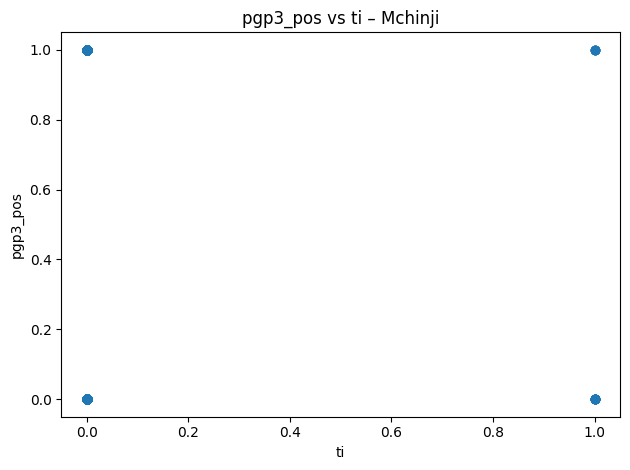

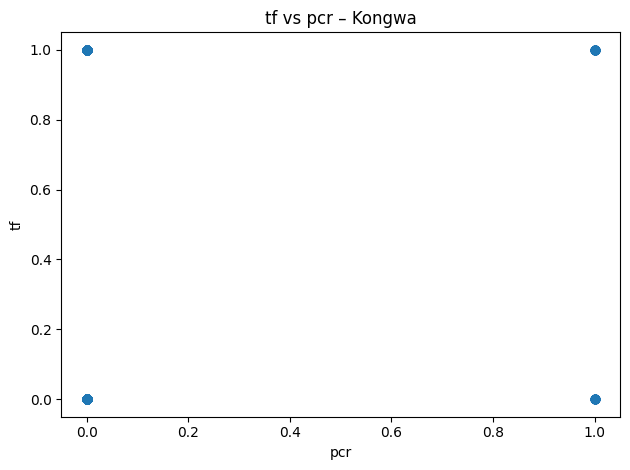

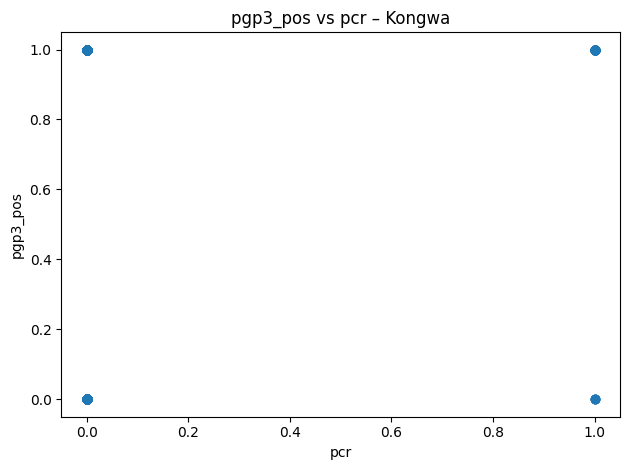

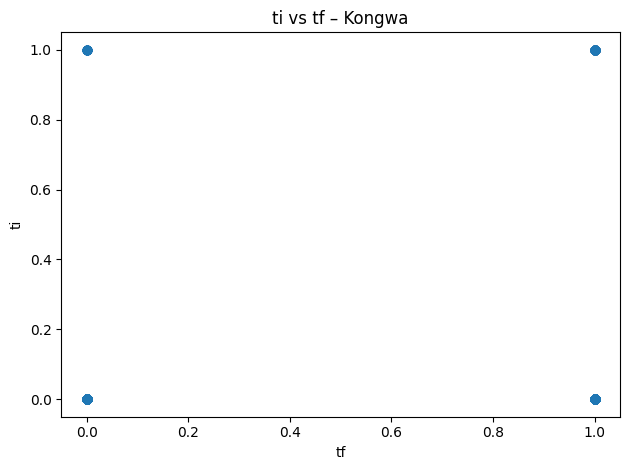

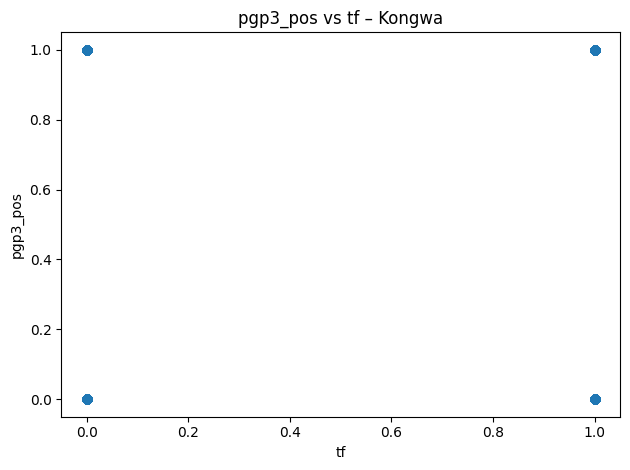

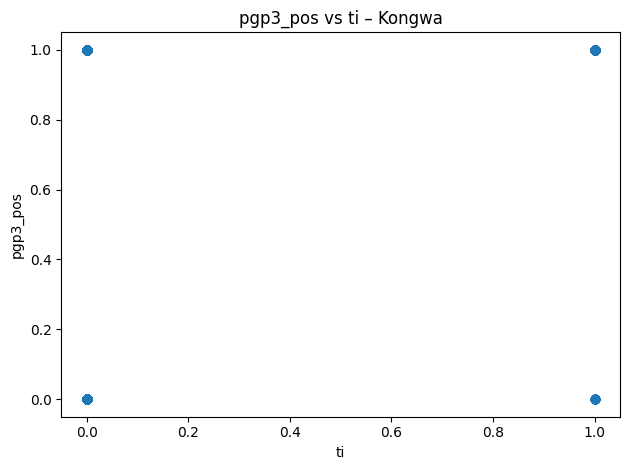

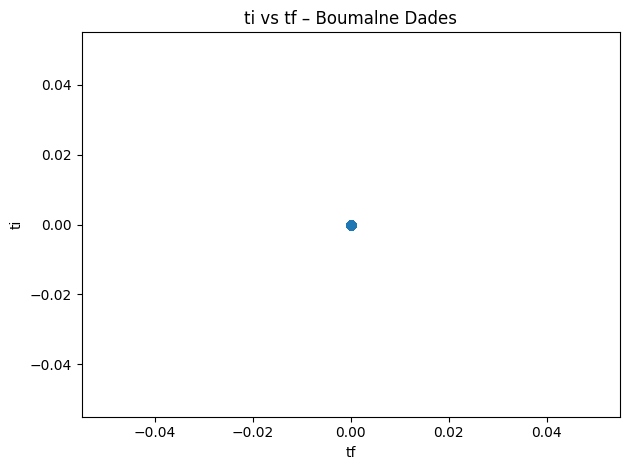

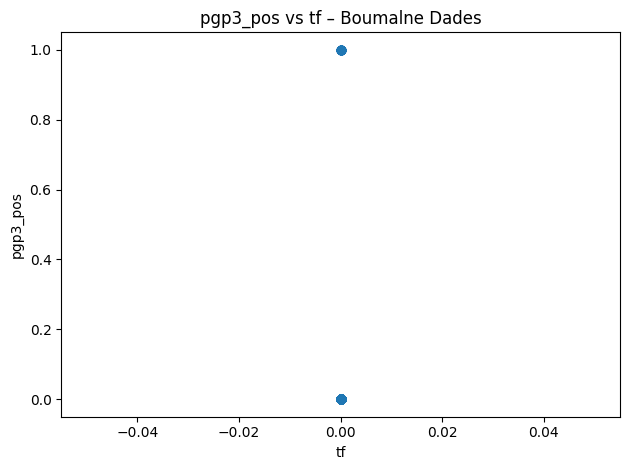

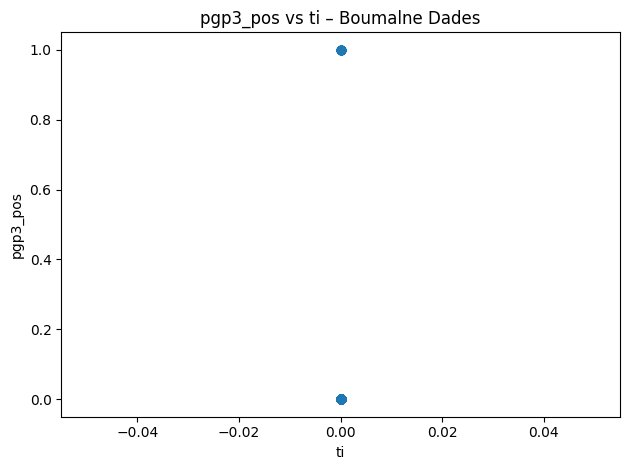

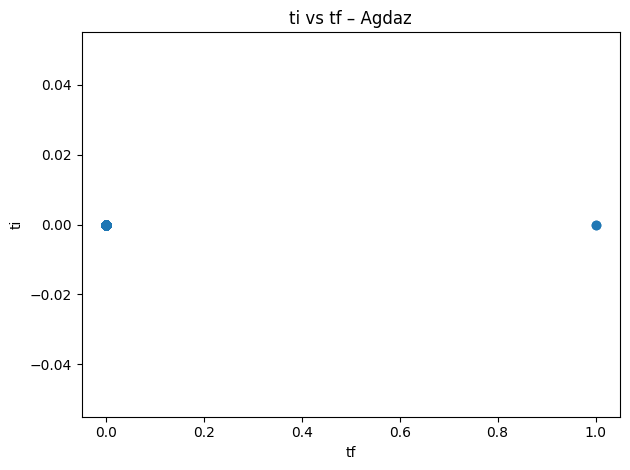

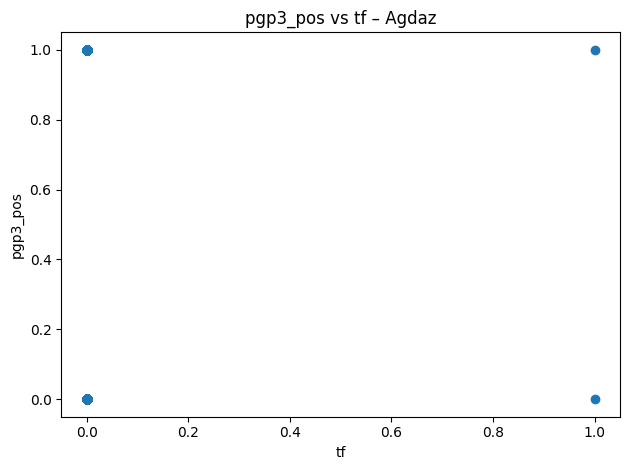

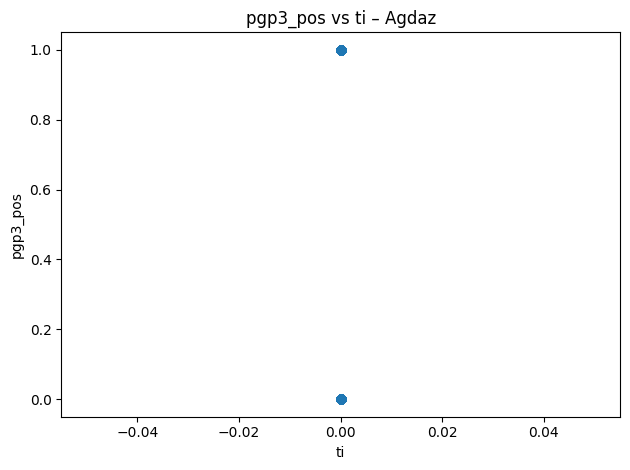

In [138]:
import itertools

# 0 ─── Make sure these columns exist exactly as named ─────────────
indicator_vars = ['pcr', 'tf', 'ti', 'pgp3_pos']

# 1 ─── Generate all unordered pairs (6 in total) ──────────────────
pairs = list(itertools.combinations(indicator_vars, 2))

# 2 ─── Loop over districts then indicator pairs ───────────────────
for district, grp_d in df.groupby('location_district', sort=False):

    for x_var, y_var in pairs:
        # Drop rows where _either_ indicator is NaN
        sub = grp_d.dropna(subset=[x_var, y_var])
        if sub.empty:
            # Skip strata with no data for this pair
            continue

        plt.figure()                        # one distinct plot
        plt.scatter(sub[x_var], sub[y_var])
        plt.title(f'{y_var} vs {x_var} – {district}')
        plt.xlabel(x_var)
        plt.ylabel(y_var)
        plt.tight_layout()
        plt.show()